1) Читаем наш датафрейм с помощью pandas

In [1]:
import pandas as pd
df = pd.read_csv('climate_change_indicators.csv')
print(df.iloc[:5, :3])

   ObjectId                       Country ISO2
0         1  Afghanistan, Islamic Rep. of   AF
1         2                       Albania   AL
2         3                       Algeria   DZ
3         4                American Samoa   AS
4         5      Andorra, Principality of   AD


2) Найти общее количество nan в датафрейме

In [2]:
total_nan_values = df.isna().sum().sum()
print(total_nan_values)

1492


3) Удалить из датафрейма строки, в которых более 2-х nan

In [3]:
original_length = len(df)
# Подсчитываем количество NaN в каждой строке
nan_counts_per_row = df.isna().sum(axis=1)
# Удаляем строки, содержащие более двух NaN, и переприсваиваем результат исходному df
df = df[nan_counts_per_row <= 2]
# Вычисляем количество удаленных строк
num_rows_removed = original_length - len(df)
print(f'Количество удаленных строк: {num_rows_removed}')

Количество удаленных строк: 57


4) В получившемся ДФ заменить nan на самое частоиспользуемое значение в столбце, если значения уникальные, то на первое найденное. Далее работаем с полученным ДФ

In [4]:
for column in df.columns:
    # Находим самое часто используемое значение в столбце или первое ненулевое, если все уникальны
    most_frequent = df[column].mode().iloc[0] if not df[column].mode().empty else df[column].dropna().iloc[0]
    # Заменяем NaN на это значение
    df[column].fillna(most_frequent, inplace=True)

5) В одном из количественных столбцов (С1) посчитать среднее, медиану, минимальное и максимальное.
Считаем для столбца F1961

In [5]:
mean_value = df['F1961'].mean()
median_value = df['F1961'].median()
min_value = df['F1961'].min()
max_value = df['F1961'].max()

print(f"Среднее значение: {mean_value}")
print(f"Медиана: {median_value}")
print(f"Минимальное значение: {min_value}")
print(f"Максимальное значение: {max_value}")

Среднее значение: 0.18457142857142855
Медиана: 0.07949999999999999
Минимальное значение: -0.694
Максимальное значение: 1.892


6) В ДФ вывести строки, в которых значение в столбце С1(F1961) больше рассчитанного среднего

In [6]:
filtered_rows = df[df['F1961'] > mean_value]
print(filtered_rows)

     ObjectId                    Country ISO2 ISO3  \
1           2                    Albania   AL  ALB   
4           5   Andorra, Principality of   AD  AND   
12         13                    Austria   AT  AUT   
22         23                     Bhutan   BT  BTN   
23         24                    Bolivia   BO  BOL   
..        ...                        ...  ...  ...   
218       219  Wallis and Futuna Islands   WF  WLF   
220       221             Western Sahara   EH  ESH   
221       222                      World   AD  WLD   
223       224                     Zambia   ZM  ZMB   
224       225                   Zimbabwe   ZW  ZWE   

                                             Indicator            Unit  \
1    Temperature change with respect to a baseline ...  Degree Celsius   
4    Temperature change with respect to a baseline ...  Degree Celsius   
12   Temperature change with respect to a baseline ...  Degree Celsius   
22   Temperature change with respect to a baseline ... 

7) Добавить новый столбец с датами. Даты следует сгенерировать, начиная с 01.01.2000 по количеству строк в ДФ

In [7]:
dates = pd.date_range(start='2000-01-01', periods=len(df), freq='D')
df['Date'] = dates
print(df.head())

   ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2                       Albania   AL  ALB   
2         3                       Algeria   DZ  DZA   
4         5      Andorra, Principality of   AD  AND   
5         6                        Angola   AO  AGO   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   
5  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   
1  Food and Agriculture Organization of the Unite...     ECCS   
2  Food and Agriculture Organization of t

8) Удалить из ДФ любой столбец (удаляем F2017)

In [8]:
df = df.drop('F2017', axis=1)
print(df.head())

   ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2                       Albania   AL  ALB   
2         3                       Algeria   DZ  DZA   
4         5      Andorra, Principality of   AD  AND   
5         6                        Angola   AO  AGO   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   
5  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   
1  Food and Agriculture Organization of the Unite...     ECCS   
2  Food and Agriculture Organization of t

9) Переименовать все столбцы ДФ (тут я не совсем понял задание, во что нужно переименвать столбцы?)

10) Выделить 10 стран с наибольшим изменением температуры за весь период и за каждые два года

In [9]:
# Исключаем стобец 2017, так как мы его удалили
columns_to_sum = [col for col in df.columns if 'F' in col and col != 'F2017']
df[columns_to_sum] = df[columns_to_sum].apply(pd.to_numeric, errors='coerce')
df['Total_Temp_Change'] = df[columns_to_sum].sum(axis=1)
sorted_countries = df.sort_values(by='Total_Temp_Change', ascending=False)
top_countries = sorted_countries.head(10)
print(top_countries[['Country', 'Total_Temp_Change']])

                         Country  Total_Temp_Change
125  Mauritania, Islamic Rep. of             53.262
132                     Mongolia             53.034
12                       Austria             48.440
220               Western Sahara             47.740
68                       Finland             47.724
4       Andorra, Principality of             47.229
114                Liechtenstein             47.177
192                  Switzerland             46.899
173                      Senegal             46.873
72                   Gambia, The             46.196


11) Реализовать функцию, которая будет прогнозировать температуру на последующие 20 лет в любой из доступных стран. Оценить точность прогноза

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np

def predict_temperature(df, country):
    # Выборка данных по стране
    country_data = df[df['Country'] == country]

    # Проверяем, есть ли данные по стране
    if country_data.empty:
        return "Данные по указанной стране отсутствуют", 0

    # Определение столбцов с данными о температуре
    temp_columns = [col for col in df.columns if col.startswith('F') and not col.endswith('2017')]

    # Проверяем, что в этих столбцах есть данные
    if not any(col in df.columns for col in temp_columns):
        return "В DataFrame отсутствуют нужные столбцы с данными о температуре", 0

    # Подготовка данных для модели
    X = np.array([int(year[1:]) for year in temp_columns]).reshape(-1, 1)
    y = country_data[temp_columns].iloc[0].astype(float).values

    # Проверяем, не пустые ли массивы X и y
    if X.size == 0 or y.size == 0:
        return "Недостаточно данных для обучения модели", 0

    # Создание и обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X, y)

    # Создание данных для прогноза на следующие 20 лет
    future_years = np.array(range(X.max() + 1, X.max() + 21)).reshape(-1, 1)

    # Прогнозирование изменений температуры
    predictions = model.predict(future_years)

    # Вычисление точности модели
    r_squared = model.score(X, y)

    return predictions, r_squared


predicted_temps, accuracy = predict_temperature(df, 'Albania')
if isinstance(predicted_temps, str):
    print(predicted_temps)
else:
    print("Прогнозируемые температуры на следующие 20 лет:", predicted_temps)
    print("Точность прогноза (R^2):", accuracy)


Прогнозируемые температуры на следующие 20 лет: [1.4115268  1.44131526 1.47110372 1.50089218 1.53068064 1.56046911
 1.59025757 1.62004603 1.64983449 1.67962295 1.70941141 1.73919988
 1.76898834 1.7987768  1.82856526 1.85835372 1.88814218 1.91793064
 1.94771911 1.97750757]
Точность прогноза (R^2): 0.5842235388024047


Коэффициент детерминации R^2 измеряет, насколько хорошо будущие выборки, будут предсказаны моделью. Он представляет собой долю дисперсии зависимой переменной, которая объяснима независимой переменной в модели линейной регрессии. Рассматривая наш пример R^2 = 0.58, это достаточно хороший результат, но его явно есть куда улучшать. Это можнотбыло бы сделать, если бы в датасете были бы больше данных которые влияют на изменение температуры, например других климатические показатели.

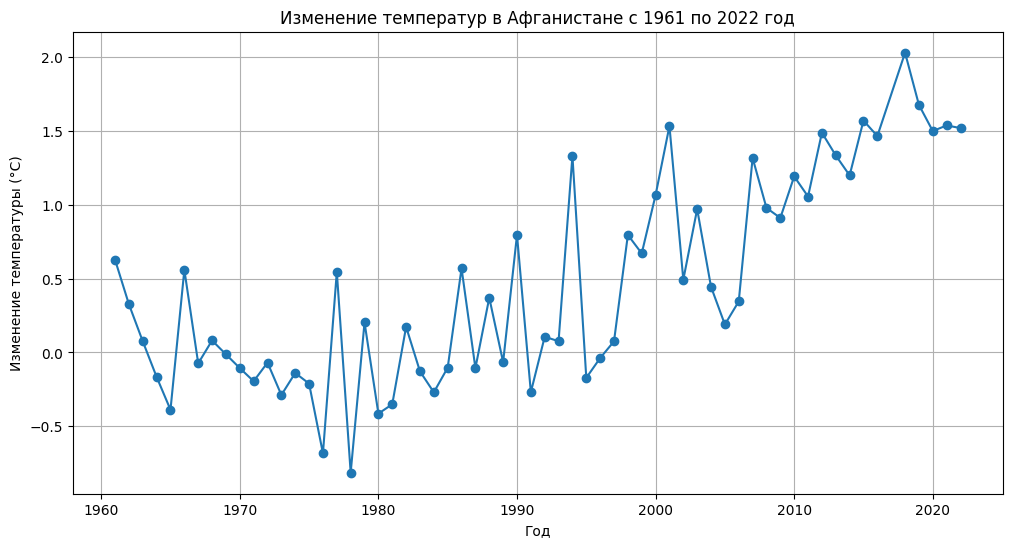

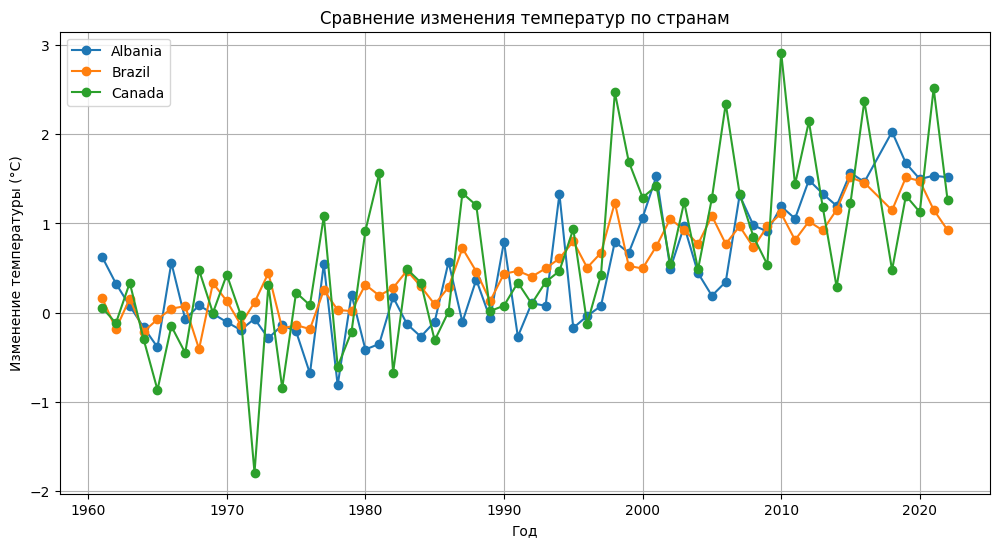

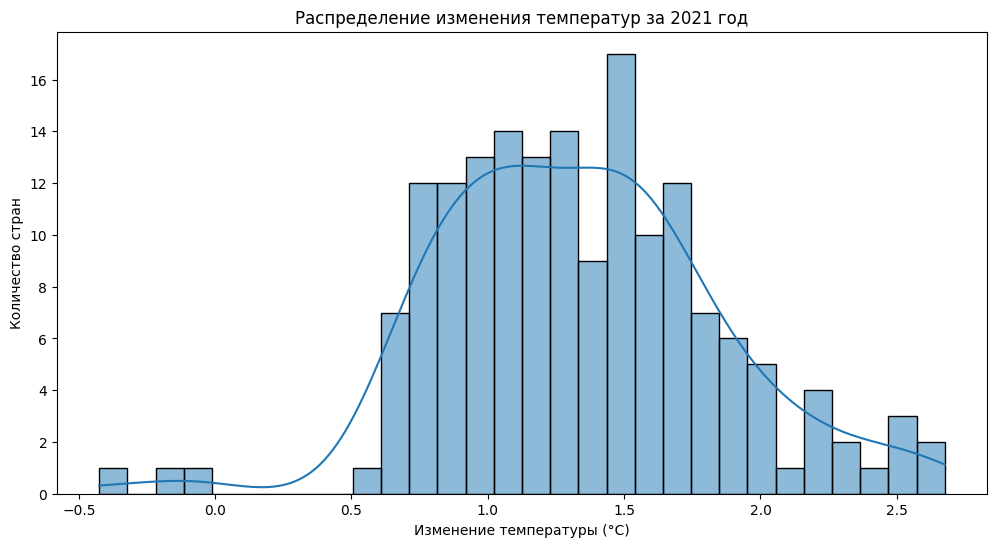

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Список годов для графиков
years = [col for col in df.columns if col.startswith('F') and not col.endswith('2017') and 'F20' in col or 'F19' in col]
years_int = [int(year[1:]) for year in years]

# 1. График изменения температур для Афганистана
afghanistan_temps = df[df['Country'] == 'Albania'][years].values.flatten()
plt.figure(figsize=(12, 6))
plt.plot(years_int, afghanistan_temps, marker='o')
plt.title('Изменение температур в Афганистане с 1961 по 2022 год')
plt.xlabel('Год')
plt.ylabel('Изменение температуры (°C)')
plt.grid(True)
plt.show()

# 2. Сравнение изменений температур для нескольких стран
countries = ['Albania', 'Brazil', 'Canada']
plt.figure(figsize=(12, 6))
for country in countries:
    country_temps = df[df['Country'] == country][years].values.flatten()
    plt.plot(years_int, country_temps, marker='o', label=country)
plt.title('Сравнение изменения температур по странам')
plt.xlabel('Год')
plt.ylabel('Изменение температуры (°C)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Гистограмма изменения температур за 2021 год по всем странам
temp_changes_2021 = df['F2021'].astype(float)
plt.figure(figsize=(12, 6))
sns.histplot(temp_changes_2021, bins=30, kde=True)
plt.title('Распределение изменения температур за 2021 год')
plt.xlabel('Изменение температуры (°C)')
plt.ylabel('Количество стран')
plt.show()
